In [1]:
from cylinder_fdm_3d import CylinderFDM
from icecream import ic
import numpy as np
from scipy.sparse.linalg import eigsh
from time import time
from matplotlib import pyplot as plt
from fft_tdse.simulator import LaserPulse
from erfgau import ErfgauPotential



In [2]:

n_r = 300
n_z = 300
n_m = 1
solver = CylinderFDM(r_max = 20, z_max = 20, n_r = n_r, n_z = n_z , n_m = n_m)

tt, rr, zz = solver.get_trz_meshgrid()
ic(tt.shape, rr.shape, zz.shape)
xx = rr*np.cos(tt)
yy = rr*np.sin(tt)


erfgau = ErfgauPotential(mu=1.0)
V = erfgau.potential_radial((rr*rr + zz*zz)**.5)
D = zz

solver.set_realspace_potential(V, rotation_symmetric=False)

#laser = LaserPulse(t0 = 0, omega = 0.057, T = 100, E0 = 0.05)
#solver.set_td_potential(D, rotation_symmetric=False)
#solver.set_td_potential_modulator(laser)

#ic(solver.V_m[0][0,0], solver.V[0,0,0])

ic| self.m_i: array([0.])
ic| cylinder_fdm_3d.py:169 in __init__() at 22:04:00.890
ic| self.n_r: 300, self.n_z: 300, self.n_m: 1
ic| self.r_max: 20, self.z_max: 20
ic| self.n_dof: 90000
ic| tt.shape: (1, 300, 300)
    rr.shape: (1, 300, 300)
    zz.shape: (1, 300, 300)
ic| m: 0.0, N: 41.56142818209105
ic| V_FFT[i, :, :]: array([[-0.05033417+0.j, -0.05067311+0.j, -0.05101666+0.j, ...,
                            -0.05101666+0.j, -0.05067311+0.j, -0.05033417+0.j],
                           [-0.05033332+0.j, -0.05067225+0.j, -0.05101578+0.j, ...,
                            -0.05101578+0.j, -0.05067225+0.j, -0.05033332+0.j],
                           [-0.05033191+0.j, -0.05067082+0.j, -0.05101431+0.j, ...,
                            -0.05101431+0.j, -0.05067082+0.j, -0.05033191+0.j],
                           ...,
                           [-0.0356514 +0.j, -0.03577123+0.j, -0.03589147+0.j, ...,
                            -0.03589147+0.j, -0.03577123+0.j, -0.0356514 +0.j],
         

In [3]:
# Set up an initial ground state guess, here a gaussian.
# Note that we are working with a reduced wavefunction.
psi = rr**.5 *  np.exp(-0.5*(rr**2 + zz**2))
psi /= np.linalg.norm(psi)

get_energy = lambda psi: np.sum(psi.conj() * solver.apply_hamiltonian(psi)).real
E = get_energy(psi)
ic('Initial guess energy:')
ic(E)

# Abuse the propagator to calculate the ground state using imaginary time propagation.
dt = -0.05j

# Set up the splitting scheme for the Crank-Nicolson propagator.
solver.setup_splitting_scheme(dt)

t_range = np.arange(0, 20, np.abs(dt))
start = time()
for k,t in enumerate(t_range):
    psi_new = solver.propagate_crank_nicolson(psi, t)

    psi_new /= np.linalg.norm(psi_new)
    delta = np.linalg.norm(psi - psi_new)
    
    psi = psi_new
    E = get_energy(psi)
    print(f't = {t:.2f}, E = {E}, delta = {delta}')
    
delta_t = time()-start
ic('Time per time step:')
ic(delta_t/len(t_range))
psi_ground_state = psi

ic| 'Initial guess energy:'
ic| E: -0.3960477716838697


t = 0.00, E = -0.41387932011853495, delta = 0.021117285849218622
t = 0.05, E = -0.4255404703765809, delta = 0.01707313307752508
t = 0.10, E = -0.4338244918522796, delta = 0.014387806817378434
t = 0.15, E = -0.44010177720359794, delta = 0.012523407136044058
t = 0.20, E = -0.4451081333097773, delta = 0.011183804464786343
t = 0.25, E = -0.4492643720955761, delta = 0.010190356507179296
t = 0.30, E = -0.45282309010381017, delta = 0.009429984010004186
t = 0.35, E = -0.45594237257818543, delta = 0.008829208036364163
t = 0.40, E = -0.45872480902282625, delta = 0.008339529851609968
t = 0.45, E = -0.46123939480840637, delta = 0.00792857691228756
t = 0.50, E = -0.4635340673478557, delta = 0.007574523760984364
t = 0.55, E = -0.4656432981122005, delta = 0.007262504678452566
t = 0.60, E = -0.4675926487451243, delta = 0.006982281926418636
t = 0.65, E = -0.46940170901650785, delta = 0.006726719145995892
t = 0.70, E = -0.4710859092441204, delta = 0.006490775498352808
t = 0.75, E = -0.47265776286518285,

ic| 'Time per time step:'
ic| delta_t/len(t_range): 0.012095324993133545


t = 19.75, E = -0.49958338379300954, delta = 2.3813188540880406e-06
t = 19.80, E = -0.49958338384001627, delta = 2.3368376402466894e-06
t = 19.85, E = -0.49958338388225104, delta = 2.2931895948679446e-06
t = 19.90, E = -0.49958338391996143, delta = 2.2503590484403303e-06
t = 19.95, E = -0.4995833839533625, delta = 2.20833062796068e-06


ic| self.m_i: array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., -8., -7., -6., -5., -4.,
                     -3., -2., -1.])
ic| cylinder_fdm_3d.py:169 in __init__() at 22:04:09.302
ic| self.n_r: 300, self.n_z: 300, self.n_m: 16
ic| self.r_max: 20, self.z_max: 20
ic| self.n_dof: 1440000
ic| m: 0.0, N: 41.56142818209105
ic| V_FFT[i, :, :]: array([[-0.05033417+0.j, -0.05067311+0.j, -0.05101666+0.j, ...,
                            -0.05101666+0.j, -0.05067311+0.j, -0.05033417+0.j],
                           [-0.05033332+0.j, -0.05067225+0.j, -0.05101578+0.j, ...,
                            -0.05101578+0.j, -0.05067225+0.j, -0.05033332+0.j],
                           [-0.05033191+0.j, -0.05067082+0.j, -0.05101431+0.j, ...,
                            -0.05101431+0.j, -0.05067082+0.j, -0.05033191+0.j],
                           ...,
                           [-0.0356514 +0.j, -0.03577123+0.j, -0.03589147+0.j, ...,
                            -0.03589147+0.j, -0.03577123+0.j, -0.0356514 

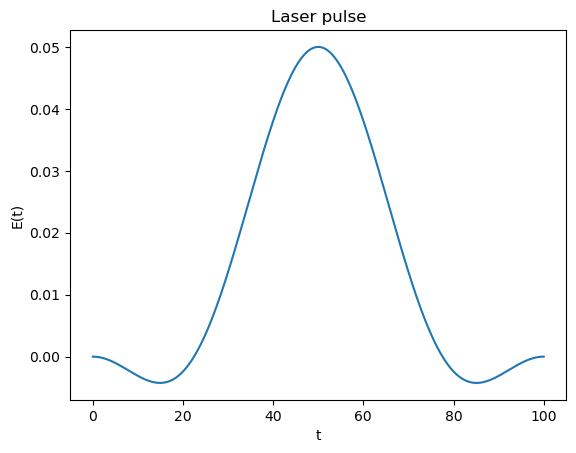

In [4]:
# Set up a new solver, now with more angular momenta and
# a time dependent laser pulse.
n_m = 16
solver = CylinderFDM(r_max = 20, z_max = 20, n_r = n_r, n_z = n_z , n_m = n_m)
tt, rr, zz = solver.get_trz_meshgrid()
xx = rr*np.cos(tt)
yy = rr*np.sin(tt)
V = erfgau.potential_radial((rr*rr + zz*zz)**.5)
D = xx # yes we could put the potential along the z axis to conserve symmetry, but this is just an example.

solver.set_realspace_potential(V)
solver.set_td_potential(D)
laser = LaserPulse(t0 = 0, omega = 0.057, T = 100, E0 = 0.05)
solver.set_td_potential_modulator(laser)

dt = 0.01
solver.setup_splitting_scheme(dt)
t_range = np.arange(0, 100+dt, dt)

plt.figure()
plt.plot(t_range, laser(t_range))
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Laser pulse')
plt.show()


In [8]:
# since the ground state is independent of theta, all the components are identical.
psi = np.zeros(solver.shape, dtype=complex)
psi[0, ...] = psi_ground_state[0, ...]
ic(solver.m_i)

mu_hist = np.zeros(len(t_range), dtype=float)

for k,t in enumerate(t_range):
    # compute dipole moment
    mu = np.sum(psi.conj() * np.fft.fft(D * np.fft.ifft(psi, axis=0), axis=0)).real
    mu_hist[k] = mu
    
    # propagate
    psi = solver.propagate_crank_nicolson(psi, t)

    # check norm conservation
    norm = np.linalg.norm(psi)
    
    if k % 10 == 0:
        print(f't = {t:.2f}, mu = {mu}, norm = {norm}')


ic| solver.m_i: array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., -8., -7., -6., -5., -4.,
                       -3., -2., -1.])


t = 0.00, mu = -6.673423354066664e-17, norm = 1.0000000000000233
t = 0.10, mu = 3.9014422629988084e-10, norm = 1.000000000000024
t = 0.20, mu = 6.260728699532239e-09, norm = 1.0000000000000242
t = 0.30, mu = 3.165384065510127e-08, norm = 1.0000000000000213


KeyboardInterrupt: 

In [8]:

ic('Computing sparse matrix')

start = time()
H_mat_sparse = solver.get_sparse_matrix_fast()
ic(hasattr(solver, 'H_kin'))
ic(hasattr(solver, 'H_pot'))
ic(hasattr(solver, 'H_pot_td'))

time_taken_sparse = time() - start
ic(time_taken_sparse)



ic| 'Computing sparse matrix'
ic| V_m_max: 0
ic| m: 0, m_ind: 0
ic| diagonals.shape: (3,)
ic| data.shape: (3, 90000)
    diagonals.shape: (3,)
    diagonals: array([ 90000,      0, -90000])
ic| 'Setting total Hamiltonian as self.H_tot'
ic| hasattr(solver, 'H_kin'): True
ic| hasattr(solver, 'H_pot'): True
ic| hasattr(solver, 'H_pot_td'): False
ic| time_taken_sparse: 0.10306525230407715


0.10306525230407715

In [10]:
E, U = eigsh(H_mat_sparse, k=10, sigma=-0.6)
ic(np.sort(E))


ic| np.sort(E): array([-0.49958419, -0.12482951, -0.12479072, -0.05453834, -0.05379616,
                       -0.05220115, -0.02305298, -0.01257923, -0.00961363, -0.00445813])


array([-0.49958419, -0.12482951, -0.12479072, -0.05453834, -0.05379616,
       -0.05220115, -0.02305298, -0.01257923, -0.00961363, -0.00445813])